In [ ]:
!pip install geopandas;
!pip install folium matplotlib mapclassify;

import geopandas as gpd;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 89.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas
!pip install folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

shape = gpd.read_file("/content/tx_vest_20.zip")

In [ ]:
shape = shape.to_crs(4326)
shape['lon'] = shape.centroid.x
shape['lat'] = shape.centroid.y

<ipython-input-6-4d03a2dd3e45>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape['lon'] = shape.centroid.x
<ipython-input-6-4d03a2dd3e45>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape['lat'] = shape.centroid.y


117.1247935295105


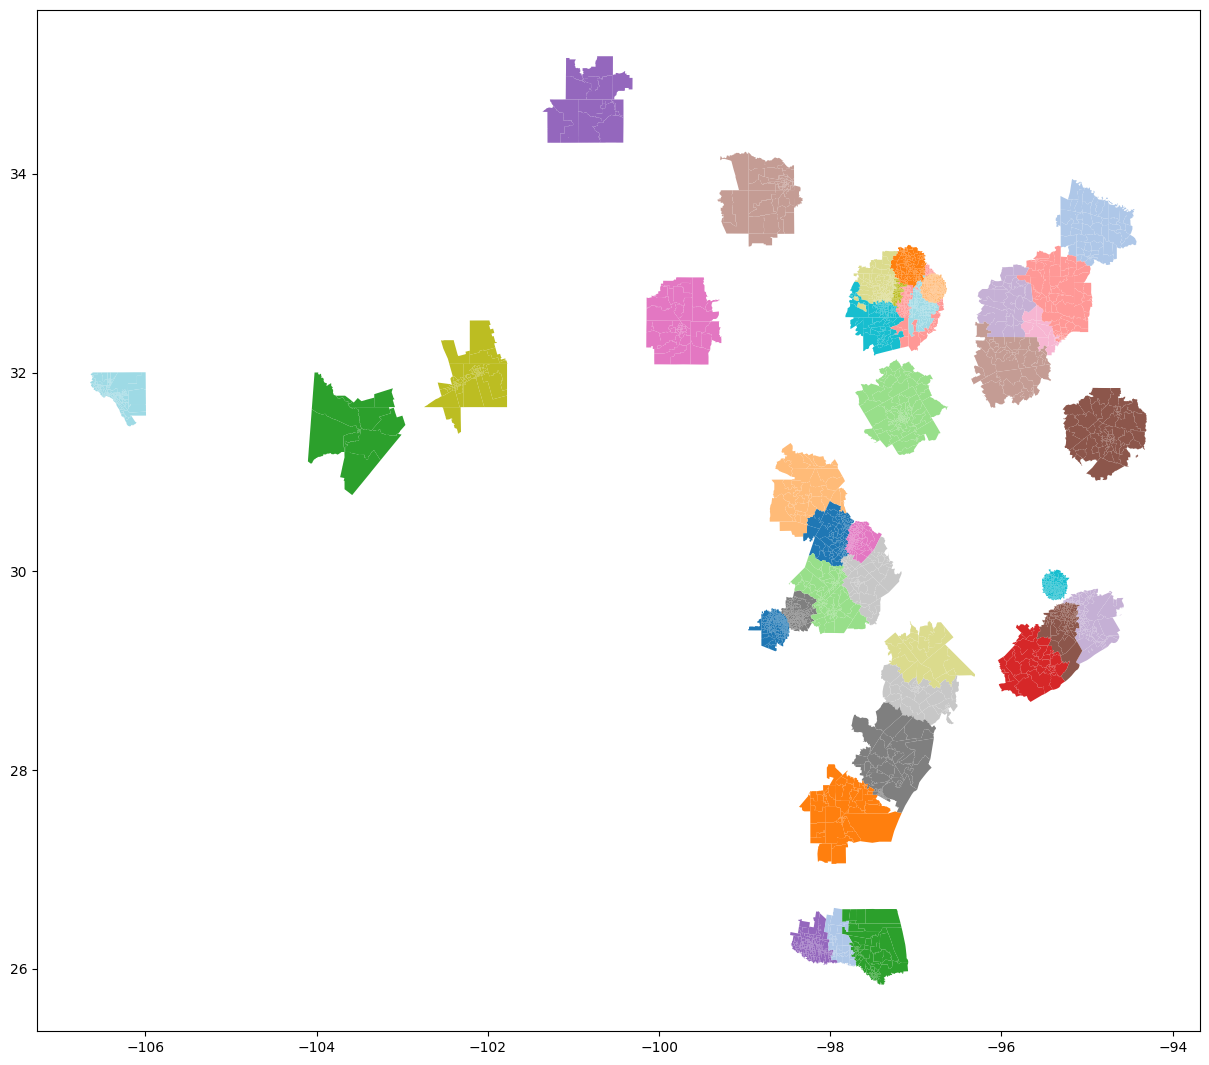

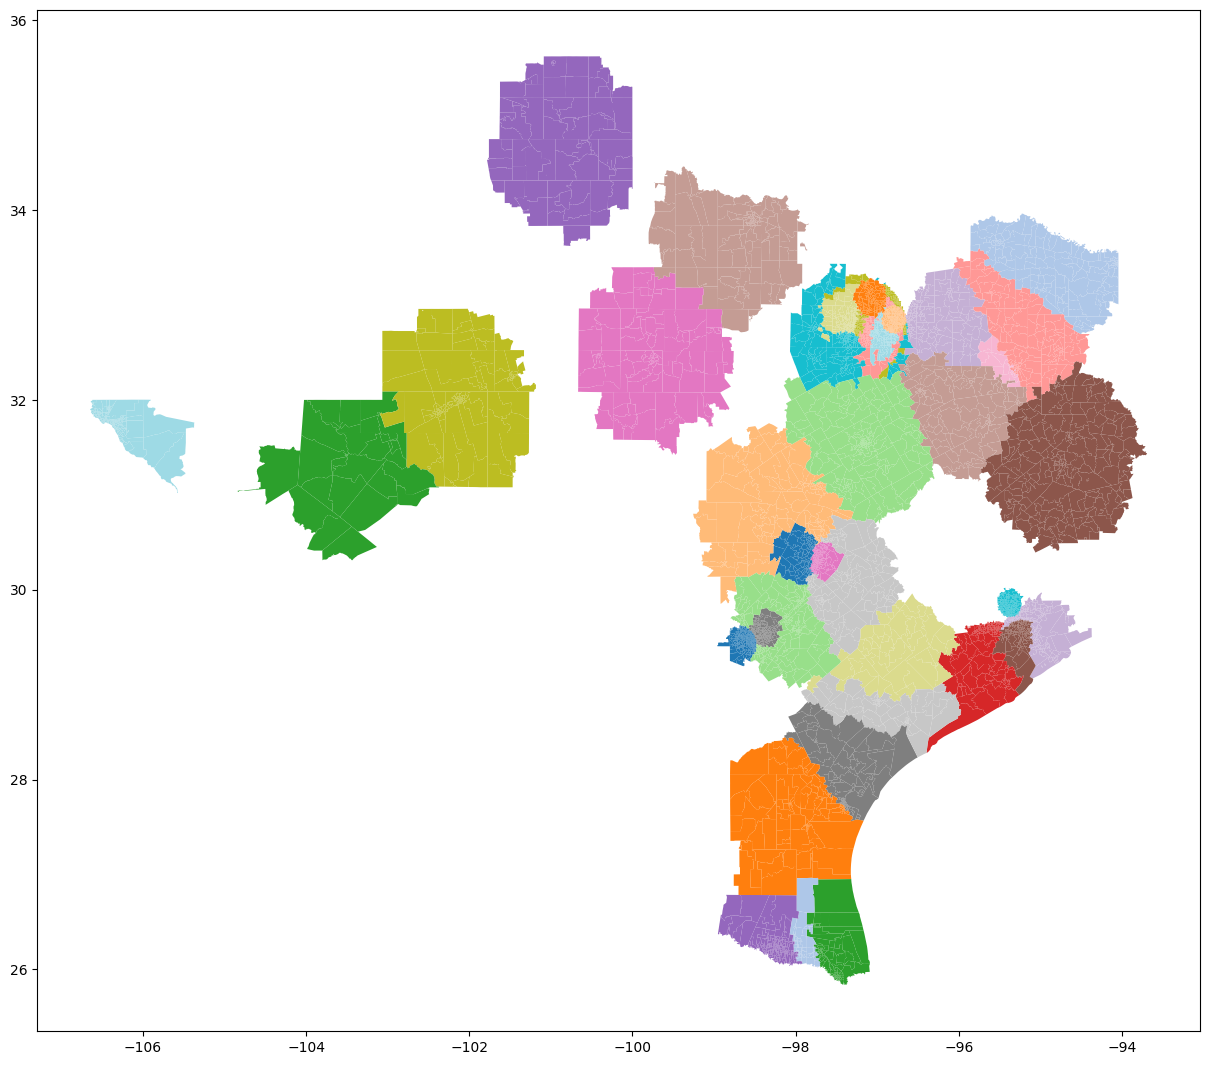

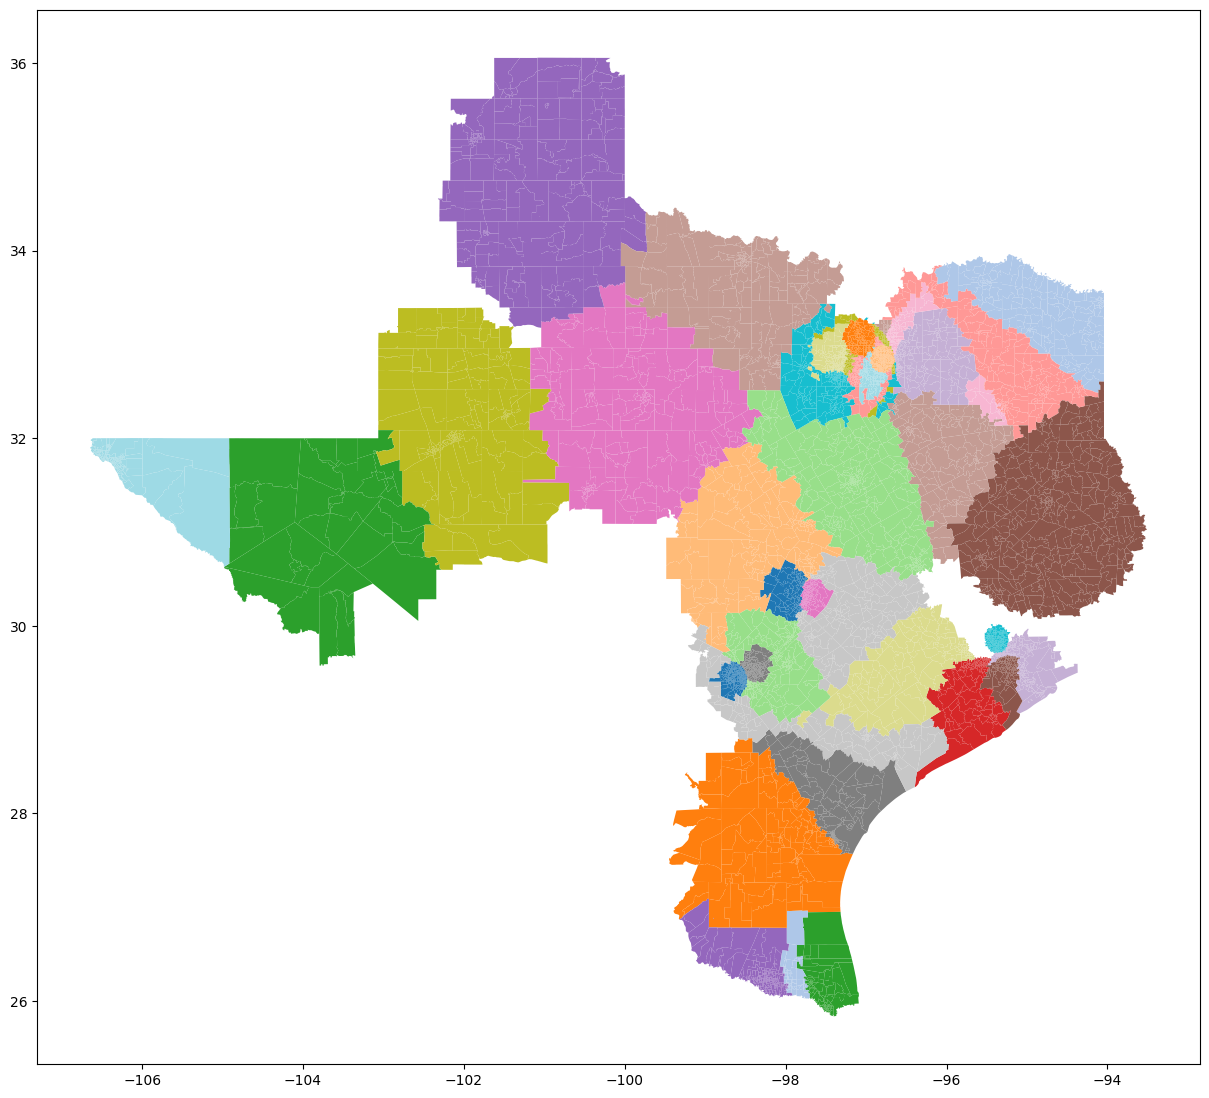

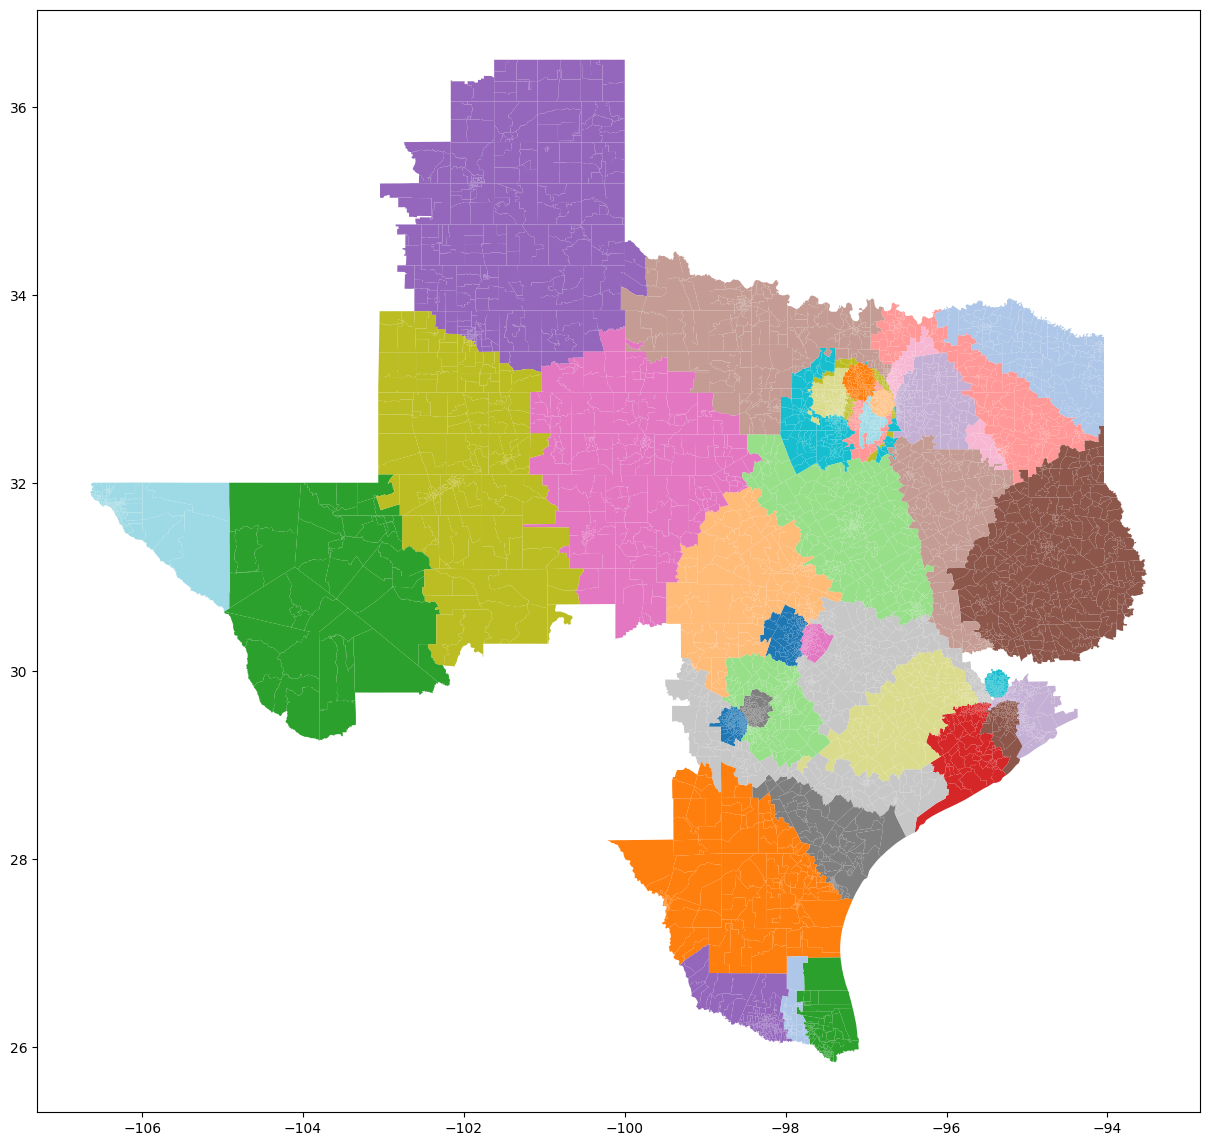

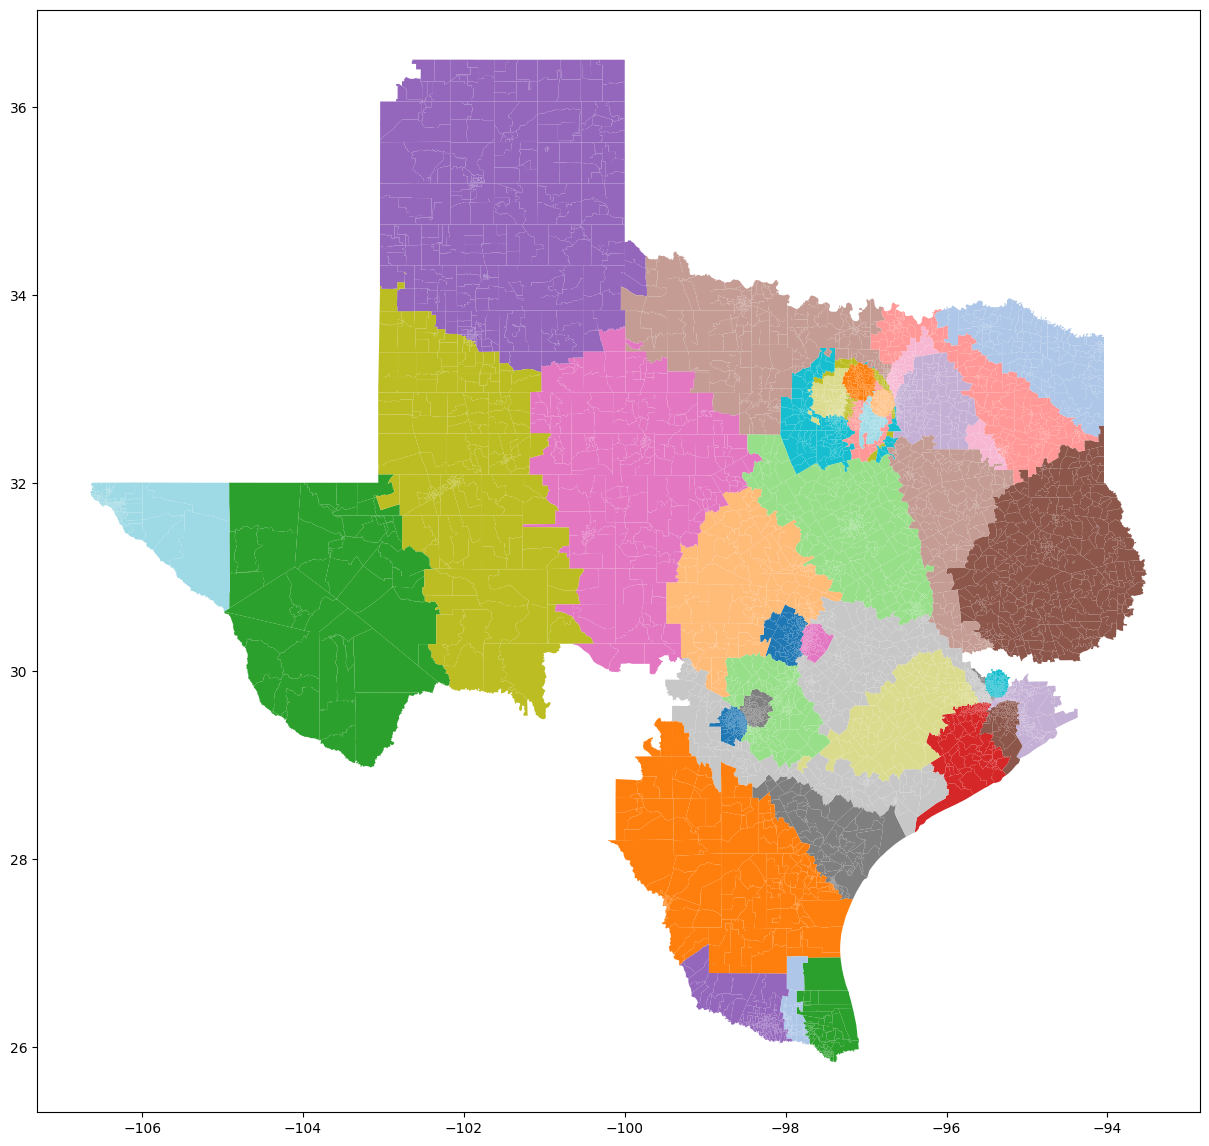

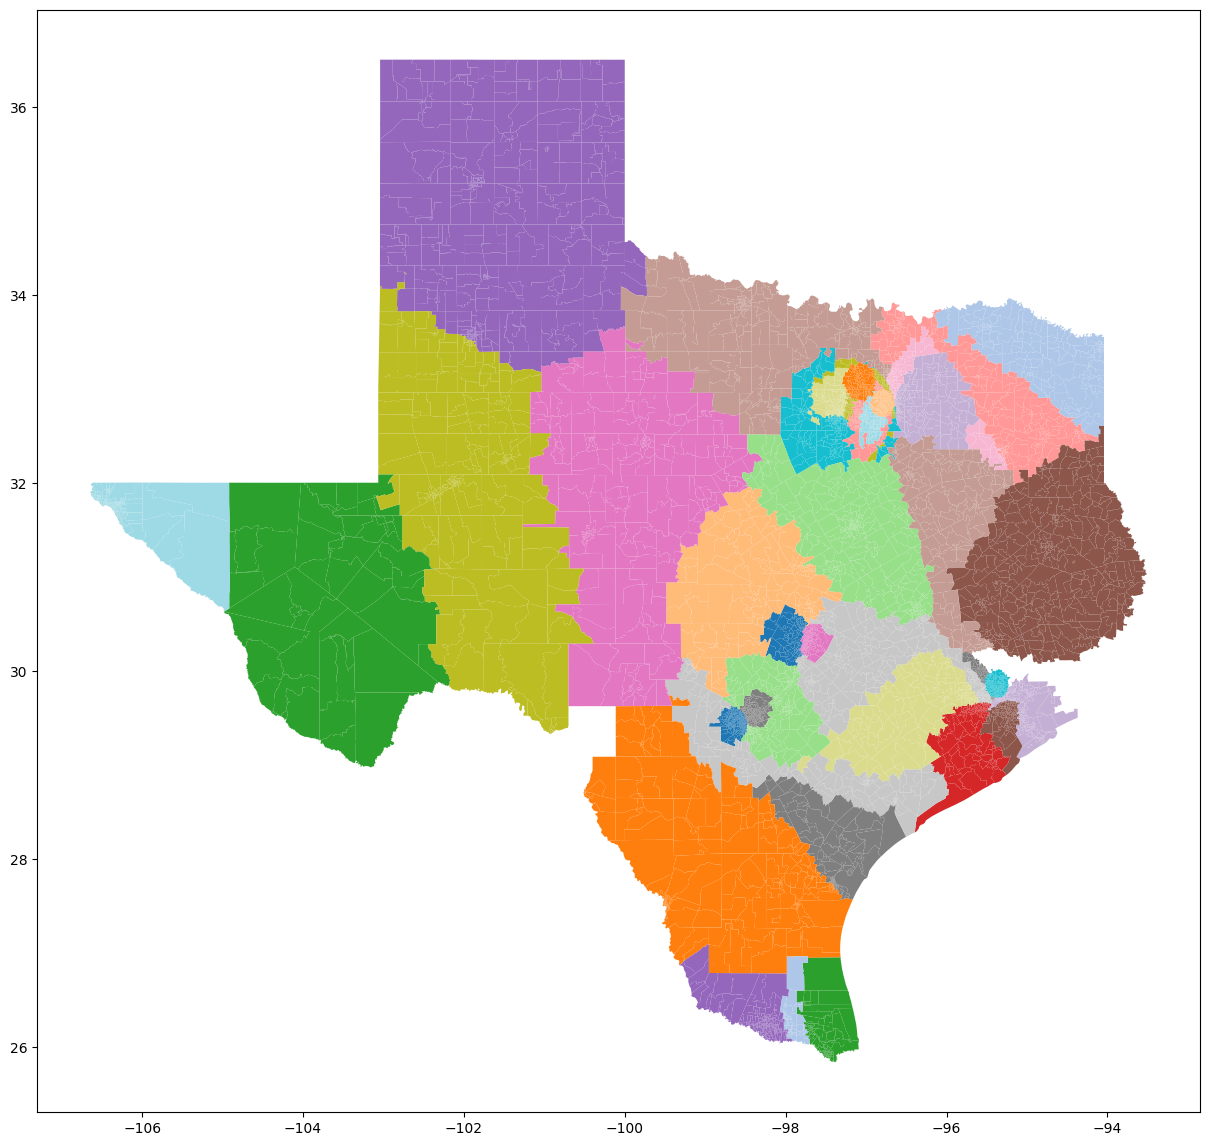

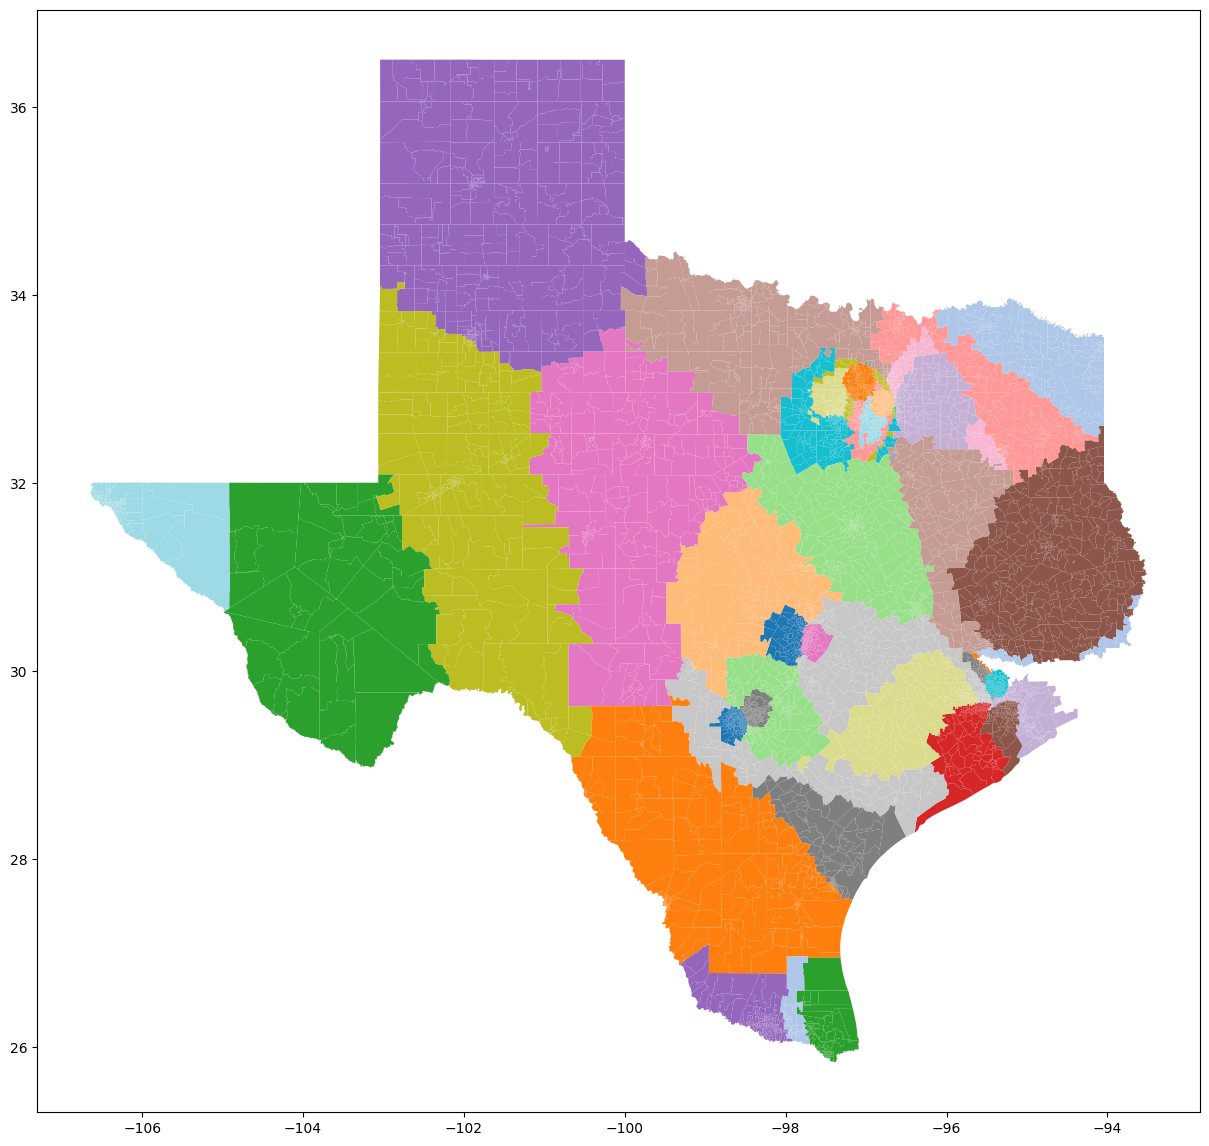

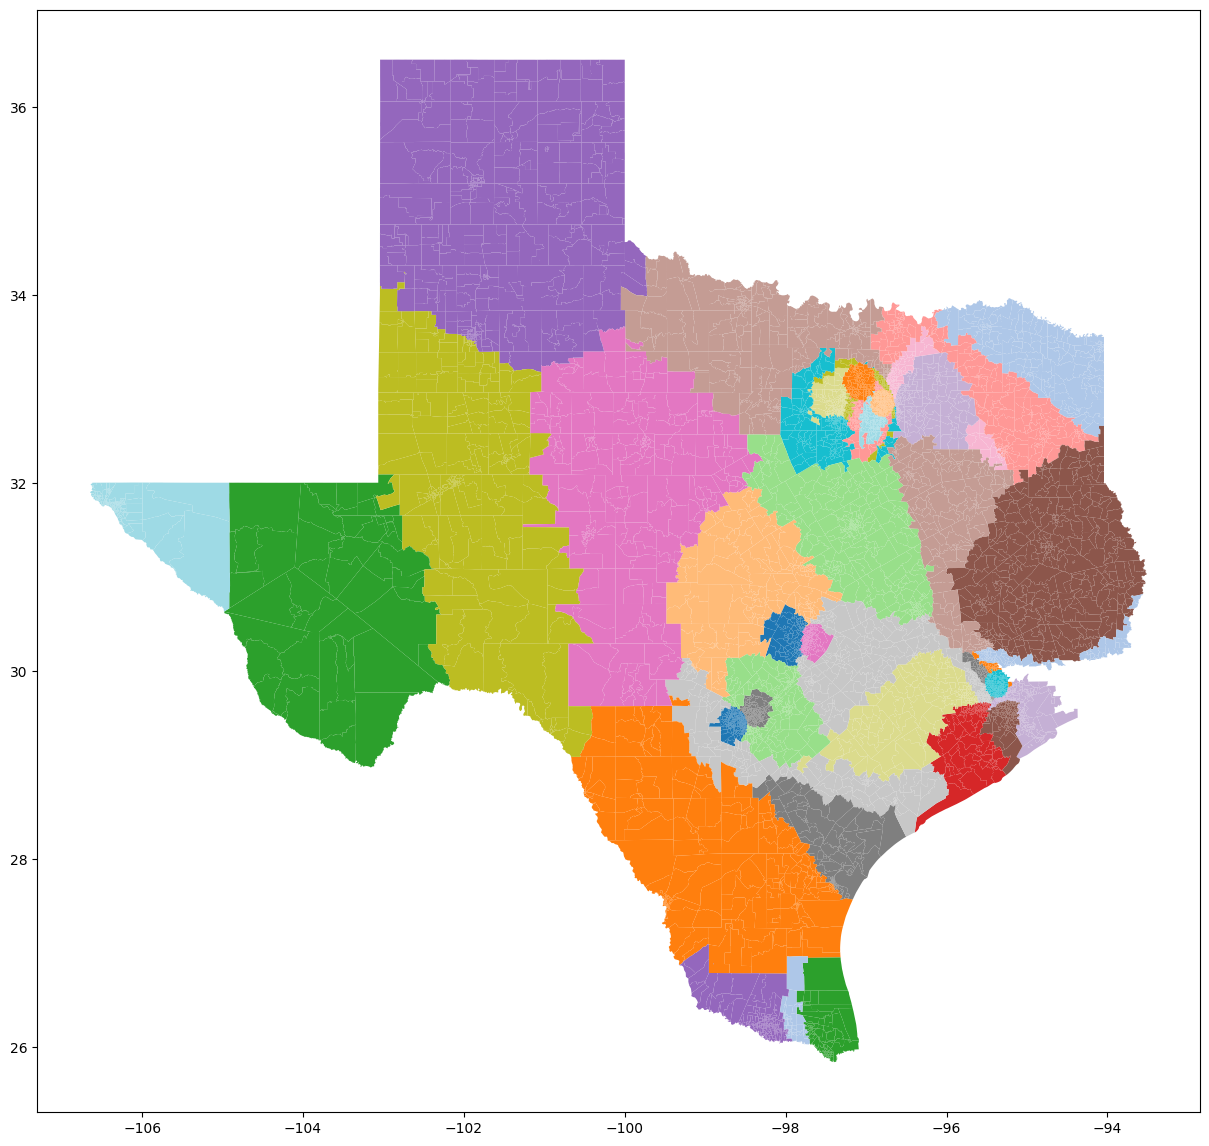

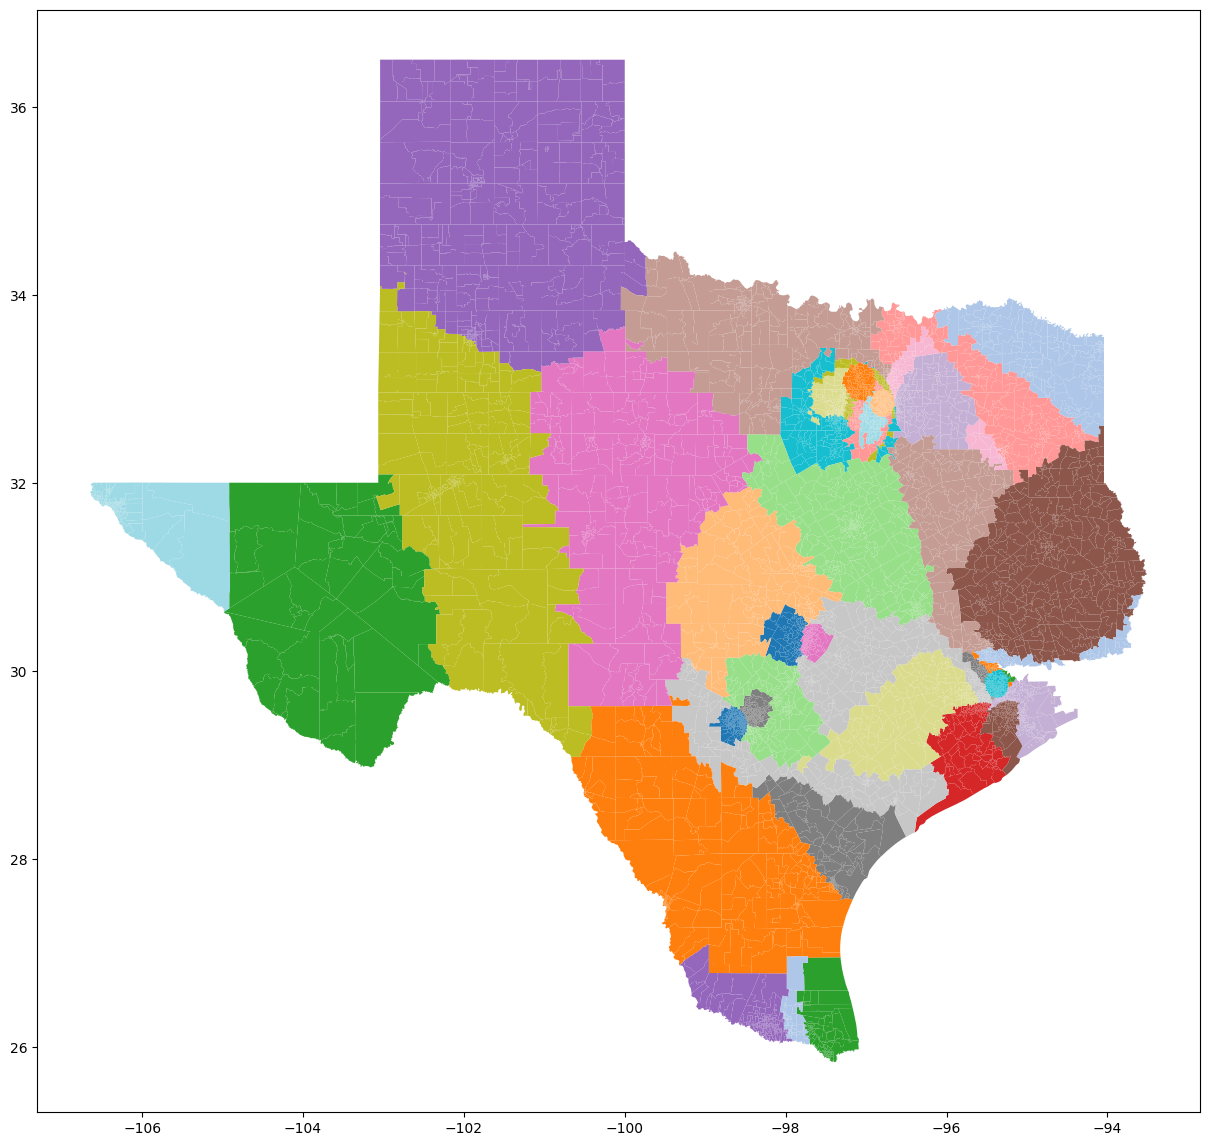

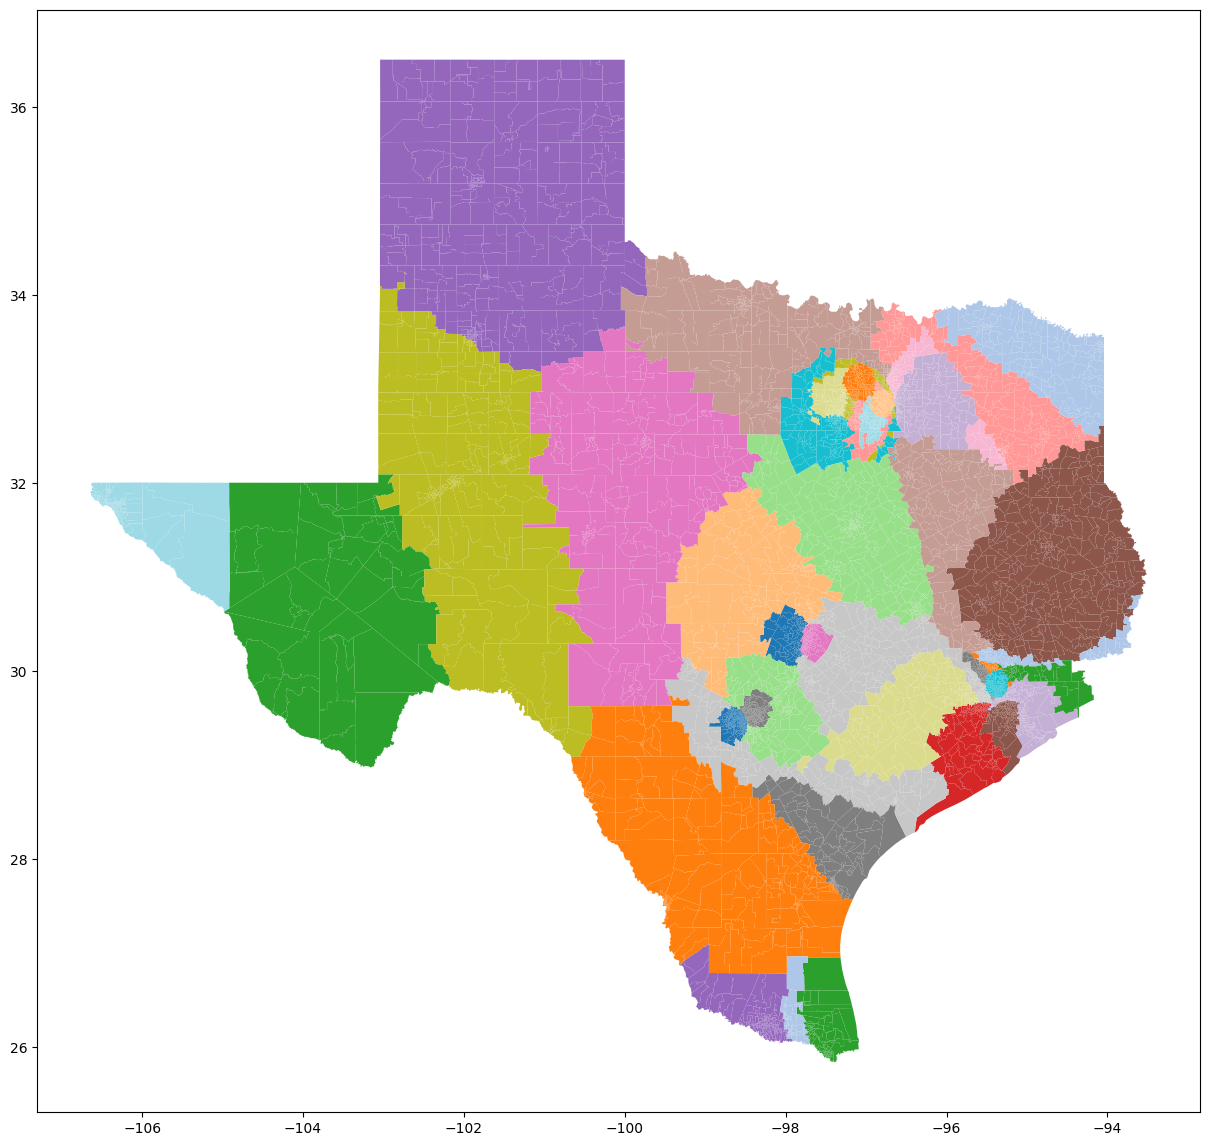

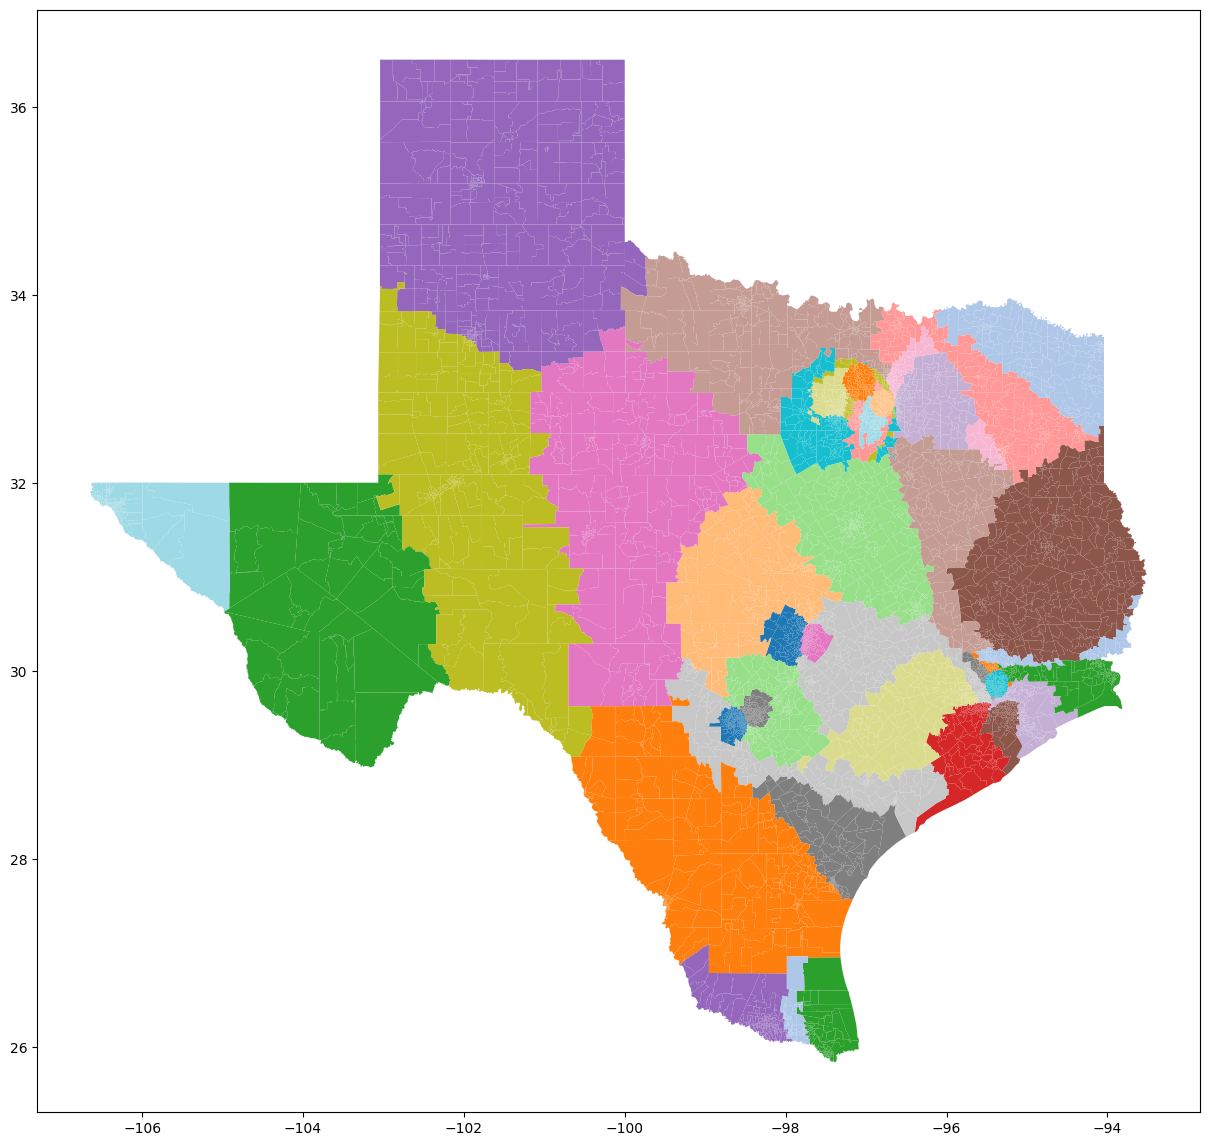

In [ ]:
from locale import D_T_FMT
from sys import builtin_module_names
import pandas as pd
from random import randint
from random import random
import math
import time

data = shape

def square_engulfment(df, districts, step = 0.05, placement='precinct'):
  df['District Number'] = 0
  df['G20VR'] = 0

  #calculates the registered voters as an approximation of population
  for x in range(len(df.iloc[:, 0])):
    df.loc[x, 'G20VR'] = (df.loc[x, 'G20PRERTRU'] + df.loc[x, 'G20PREDBID'] + df.loc[x, 'G20PRELJOR'])

  #whats the threshold for this state (population/districts)
  threshold = sum(df.loc[:, 'G20VR'])/districts
  #print(sum(df.loc[:, 'G20VR']), threshold)
  gap = 0
  counter = 0
  new_df = pd.DataFrame()
  pop_list = []
  lon_centers = []
  lat_centers = []
  index_list = []

  #option control. I tried to make it random by latitude and longitude but it doesn't work. Use "precinct" in the arguments
  if placement == "precinct":
    for n in range(districts):
      num = random()
      lon_centers.append(df.loc[round(num*len(df.iloc[:, 0])), 'lon'])
      lat_centers.append(df.loc[round(num*len(df.iloc[:, 0])), 'lat'])
      pop_list.append(df.loc[round(num*len(df.iloc[:, 0])), 'G20VR'])
      df.loc[round(num*len(df.iloc[:, 0])), "District Number"] = n+1
      index_list.append(round(num*len(df.iloc[:, 0])))
    new_df = df.iloc[index_list, :]
    df = df.drop(index_list)
    df = df.reset_index(drop=True)
  elif placement == "latlong":
    lon_min, lon_max, lat_min, lat_max = min(df.loc[:, 'lon']), max(df.loc[:, 'lon']), min(df.loc[:, 'lat']), max(df.loc[:, "lat"])
    for n in range(districts):
      num = random()
      lon_centers.append((lon_max-lon_min)*num+lon_min)
      lat_centers.append((lat_max-lat_min)*num+lat_min)
      print((lon_max-lon_min)*num+lon_min, (lat_max-lat_min)*num+lat_min)
      pop_list = [0] * districts

  checker=1

  #iterative step. continues until checker is 0 (which is when all precincts are assigned)
  while checker != 0:
    index_list = []
    for n in range(len(lon_centers)):
      if pop_list[n] > 0.98*threshold:
        #print("passing ...", pop_list[n], threshold)
        #print(sum(pop_list))
        pass
      else:
        for x in range(len(df.iloc[:, 0])):
          if math.sqrt(pow(df.loc[x, 'lon']-lon_centers[n], 2) + pow(df.loc[x, 'lat']-lat_centers[n], 2)) < gap and df.loc[x, "District Number"] == 0:
            df.loc[x, "District Number"] = n+1
            pop_list[n] += df.loc[x, 'G20VR']
            index_list.append(x)
          elif gap > 5:
            pass
            #print(math.sqrt(pow(df.loc[x, 'lon']-lon_centers[n], 2) + pow(df.loc[x, 'lat']-lat_centers[n], 2)))

    gap += step

    #print(gap)
    checker = 0
    for x in range(len(df.loc[:, "District Number"])):
      if df.loc[x, "District Number"] == 0:
        checker += 1

    new_df = pd.concat([new_df, df.iloc[index_list, :]])


    df = df.drop(index_list)
    df = df.reset_index(drop=True)
    #print(checker)
    #print(len(df.iloc[:, 1]))
    #print(df)

    counter += 1
    #saves figures
    if (counter % 10 == 0):
      redistrict = new_df
      redistrict.reset_index(inplace=True, drop=True)

      fig, ax = plt.subplots(1, 1, figsize=(15, 15))
      redistrict.plot("District Number", ax=ax, cmap="tab20")
      #plt.savefig('arkansas' + str(gap) + '.png')

  return new_df

start_time = time.time()
redistrict = square_engulfment(data, 38)
print(time.time()-start_time)


In [ ]:
a = redistrict.groupby("District Number").sum();
a = a[['G20PRERTRU', 'G20PREDBID', 'G20PRELJOR']]

b, t = 0, 0;

for d in a.index:
  if a.loc[d, 'G20PREDBID'] > a.loc[d, 'G20PRERTRU']:
    b += 1
  else:
    t += 1

print("D: ", b, " R: ", t)

D:  15  R:  23


<ipython-input-8-8152b4681cec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = redistrict.groupby("District Number").sum();


Compactness evaluation

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

#polbsy popper test
#get the area and perimeter of each district
districts = data
fig_size = 20.0

districts['area'] = districts.area
districts['perimeter'] = districts.length
#calculate the polbsy popper score for each district
#4 pi area / perimeter^2
districts['polbsy_popper'] = 4 * np.pi * districts['area'] / districts['perimeter']**2
#plot the polbsy popper score for each district
districts.plot(column='polbsy_popper', legend=True, figsize=fig_size, edgecolor='black', linewidth=0.5, cmap='Blues')

<ipython-input-19-872c953fc864>:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['area'] = districts.area
<ipython-input-19-872c953fc864>:9: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['perimeter'] = districts.length


TypeError: ignored

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

df = data

# create a GeoDataFrame from the district data in df
gdf = gpd.GeoDataFrame(df, geometry=[Polygon(zip(df.lon, df.lat))])

# calculate the Polsby-Popper score for each district
gdf['polsby_popper'] = 4 * math.pi * gdf.area / gdf.length ** 2

# calculate the Reock score for each district
gdf['reock'] = gdf.minimum_rotated_rectangle.area / gdf.area

# calculate the Convex Hull score for each district
from scipy.spatial import ConvexHull

# assuming df contains geographic coordinates for each district
for district in df['District Number'].unique():
    # get the coordinates for this district
    district_coords = df.loc[df['District Number'] == district, ['lon', 'lat']].values
    # calculate the convex hull for this district
    district_hull = ConvexHull(district_coords)
    # print the area of the convex hull
    print(f"District {district} convex hull area: {district_hull.area:.2f}")



ValueError: ignored